In [1]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-colorblind')
plt.rcParams["figure.figsize"] = (14,8)
import numpy as np 

def load(directory,name,runs):
    run = 0
    values = np.load(directory+name+"-"+str(run)+".npy")
    for run in range(run+1,runs):
        value = np.load(directory+name+"-"+str(run)+".npy")
        values = np.vstack((values,value))
        
    means = np.mean(values,axis=0)
    stds = np.std(values,axis=0)
    
    return means,stds  

directory = "../linear-probe-values/accuracy/"

ResNet18mean,ResNet18std = load(directory,"ResNet18-CIFAR-10",5)
ResNet34mean,ResNet34std = load(directory,"ResNet34-CIFAR-10",5)
ResNet50mean,ResNet50std = load(directory,"ResNet50-CIFAR-10",5)
BranchedResNet18mean,BranchedResNet18std = load(directory,"BranchedResNet18-CIFAR-10",5)
BranchedResNet34mean,BranchedResNet34std = load(directory,"BranchedResNet34-CIFAR-10",5)
BranchedResNet50mean,BranchedResNet50std = load(directory,"BranchedResNet50-CIFAR-10",5)

directory = "../linear-probe-values/loss/"

ResNet18loss_mean,ResNet18loss_std = load(directory,"ResNet18-CIFAR-10",5)
ResNet34loss_mean,ResNet34loss_std = load(directory,"ResNet34-CIFAR-10",5)
ResNet50loss_mean,ResNet50loss_std = load(directory,"ResNet50-CIFAR-10",5)
BranchedResNet18loss_mean,BranchedResNet18loss_std = load(directory,"BranchedResNet18-CIFAR-10",5)
BranchedResNet34loss_mean,BranchedResNet34loss_std = load(directory,"BranchedResNet34-CIFAR-10",5)
BranchedResNet50loss_mean,BranchedResNet50loss_std = load(directory,"BranchedResNet50-CIFAR-10",5)

In [2]:
def get_values(values):
    return(np.arange(1,values.shape[0]+1))

def plot_accuracies(accuracies,errors,name,color,branched=False):

    layers = get_values(accuracies)
    if branched == True:
        plt.plot(layers,accuracies,'-.', label = name, color = color)
        plt.fill_between(layers, accuracies-errors, accuracies+errors,alpha=0.4, color = color)
    if branched == False:
        plt.plot(layers,accuracies, label = name, color = color)
        plt.fill_between(layers, accuracies-errors, accuracies+errors,alpha=0.4, color = color)

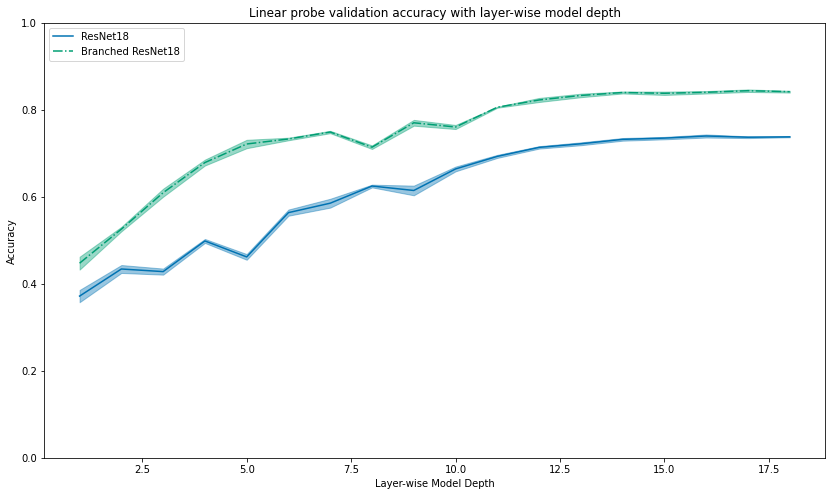

In [3]:
plot_accuracies(ResNet18mean,ResNet18std,'ResNet18','C0')
plot_accuracies(BranchedResNet18mean,BranchedResNet18std,'Branched ResNet18','C1',branched=True)
plt.title('Linear probe validation accuracy with layer-wise model depth')
plt.ylim(0,1)
plt.xlabel("Layer-wise Model Depth")
plt.ylabel("Accuracy")
plt.legend(loc=2)
plt.savefig('../results/CIFAR10/linear-probes/layer-wise-ResNet18.pdf', bbox_inches = 'tight')
plt.show()

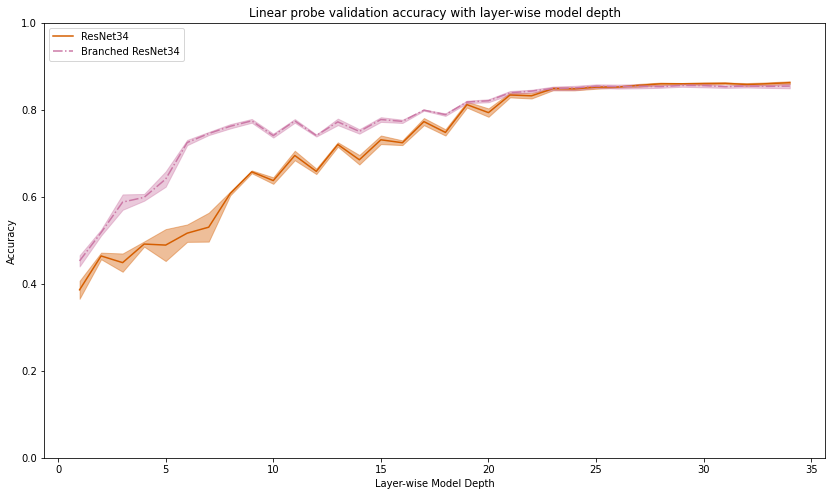

In [4]:
plot_accuracies(ResNet34mean,ResNet34std,'ResNet34','C2')
plot_accuracies(BranchedResNet34mean,BranchedResNet34std,'Branched ResNet34','C3',branched=True)
plt.title('Linear probe validation accuracy with layer-wise model depth')
plt.ylim(0,1)
plt.xlabel("Layer-wise Model Depth")
plt.ylabel("Accuracy")
plt.legend(loc=2)
plt.savefig('../results/CIFAR10/linear-probes/layer-wise-ResNet34.pdf', bbox_inches = 'tight')
plt.show()

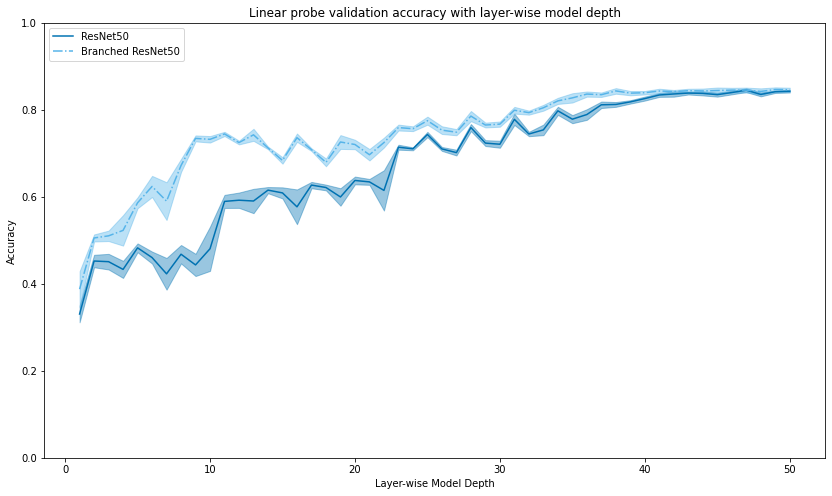

In [5]:
plot_accuracies(ResNet50mean,ResNet50std,'ResNet50','C6')
plot_accuracies(BranchedResNet50mean,BranchedResNet50std,'Branched ResNet50','C5',branched=True)
plt.title('Linear probe validation accuracy with layer-wise model depth')
plt.ylim(0,1)
plt.xlabel("Layer-wise Model Depth")
plt.ylabel("Accuracy")
plt.legend(loc=2)
plt.savefig('../results/CIFAR10/linear-probes/layer-wise-ResNet50.pdf', bbox_inches = 'tight')
plt.show()

In [6]:
def get_values(values):
    return(np.linspace(0,1,values.shape[0]))

plt.plot(get_values(ResNet18_accuracy),ResNet18_accuracy, label = 'ResNet18', color = 'C0')
plt.plot(get_values(ResNet34_accuracy),ResNet34_accuracy, label = 'ResNet34', color = 'C2')
plt.plot(get_values(ResNet50_accuracy),ResNet50_accuracy, label = 'ResNet34', color = 'C3')
plt.plot(get_values(BranchedResNet18_accuracy),BranchedResNet18_accuracy, '-.', label = 'Branched ResNet18', color = 'C0')
plt.plot(get_values(BranchedResNet34_accuracy),BranchedResNet34_accuracy, '-.', label = 'Branched ResNet34', color = 'C2')
plt.plot(get_values(BranchedResNet50_accuracy),BranchedResNet50_accuracy, '-.', label = 'Branched ResNet50', color = 'C3')



plt.title('Linear probe validation accuracy with normalised model depth')
plt.ylim(0,1)
plt.xlabel("Normalised Model Depth")
plt.ylabel("Accuracy")
plt.legend(loc=2)
plt.savefig('../results/CIFAR10/linear-probes/accuracy-branched-networks-normalised.pdf', bbox_inches = 'tight')
plt.show()

NameError: name 'ResNet18_accuracy' is not defined

In [ ]:
plt.plot(get_values(ResNet18_accuracy),ResNet18_loss, label = 'ResNet18', color = 'C0')
plt.plot(get_values(ResNet34_accuracy),ResNet34_loss, label = 'ResNet34', color = 'C2')
# plot(ResNet50_accuracy,'ResNet50')
plt.plot(get_values(BranchedResNet18_accuracy),BranchedResNet18_loss, '-.', label = 'Brached ResNet18', color = 'C0')
plt.plot(get_values(BranchedResNet34_accuracy),BranchedResNet34_loss, '-.', label = 'Brached ResNet34', color = 'C2')
# plot(BranchedResNet50_accuracy,'Branched ResNet50')


plt.title('Linear probe validation loss with normalised model depth')

plt.xlabel("Normalised Model Depth")
plt.ylabel("Loss")
plt.legend(loc=2)
plt.savefig('../results/CIFAR10/linear-probes/loss-branched-networks-normalised.pdf', bbox_inches = 'tight')
plt.show()

In [ ]:
def plot_layer_wise(values,name):
      plt.plot(np.arange(51-values.shape[0],51,),values,label=name)
        
# from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

fig, ax = plt.subplots()

plt.title('Class separation with layer-wise model depth')
ax.plot(np.arange(51-ResNet18.shape[0],51,),ResNet18,label='ResNet18',color='C0')
ax.plot(np.arange(51-ResNet34.shape[0],51,),ResNet34,label='ResNet34',color='C1')
ax.plot(np.arange(51-ResNet50.shape[0],51,),ResNet50,label='ResNet50',color='C2')
ax.plot(np.arange(51-BranchedResNet18.shape[0],51,),BranchedResNet18,'--',label='Branched ResNet18',color='C0')
ax.plot(np.arange(51-BranchedResNet34.shape[0],51,),BranchedResNet34,'--',label='Branched ResNet34',color='C1')
ax.plot(np.arange(51-BranchedResNet50.shape[0],51,),BranchedResNet50,'--',label='Branched ResNet50',color='C2')
plt.ylim(0.0,1.0)
plt.xlabel('layer')
plt.ylabel('$R^2$')



axins = inset_axes(ax, width=5.5, height=4.5, bbox_to_anchor=(0.05,0.2), loc=3, bbox_transform=ax.transAxes)
axins.plot(np.arange(51-ResNet18.shape[0],51,),ResNet18,label='ResNet18',color='C0')
axins.plot(np.arange(51-ResNet34.shape[0],51,),ResNet34,label='ResNet34',color='C1')
axins.plot(np.arange(51-ResNet50.shape[0],51,),ResNet50,label='ResNet50',color='C2')
axins.plot(np.arange(51-BranchedResNet18.shape[0],51,),BranchedResNet18,'--',label='Branched ResNet18',color='C0')
axins.plot(np.arange(51-BranchedResNet34.shape[0],51,),BranchedResNet34,'--',label='Branched ResNet34',color='C1')
axins.plot(np.arange(51-BranchedResNet50.shape[0],51,),BranchedResNet50,'--',label='Branched ResNet50',color='C2')

# sub region of the original image
x1, x2, y1, y2 = 45, 50.1, 0.03, 0.8 
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
axins.tick_params(axis = "x", which = "both", bottom = False, top = False)
axins.tick_params(axis = "y", which = "both", left = False, right = False)


# plt.xticks(visible=False)
# plt.yticks(visible=False)

# draw a bbox of the region of the inset axes in the parent axes and
# connecting lines between the bbox and the inset axes area
mark_inset(ax, axins, loc1=1, loc2=3, fc="none", ec="0.5")
axins.legend()
plt.savefig('../results/branched-resnets-layer-wise.pdf', bbox_inches = 'tight')
plt.draw()
plt.show()

In [ ]:
plot(ResNet18,'ResNet18')
plot(ResNet34,'ResNet34')
plot(ResNet50,'ResNet50')
plot(GoogLeNet,"GoogLeNet")
# plot(PNASnet,"PNAS-Net")


plt.title('Class separation with normalised model depth')
plt.ylim(0,1)
plt.xlabel("Normalised Model Depth")
plt.ylabel("$R^2$")
plt.legend(loc=2)
plt.savefig('../results/all-models-normalised.pdf', bbox_inches = 'tight')
plt.show()

In [ ]:
# from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

fig, ax = plt.subplots()

plt.title('Class separation with layer-wise model depth')
ax.plot(np.arange(51-ResNet18.shape[0],51,),ResNet18,label='ResNet18',color='C0')
ax.plot(np.arange(51-ResNet34.shape[0],51,),ResNet34,label='ResNet34',color='C1')
ax.plot(np.arange(51-ResNet50.shape[0],51,),ResNet50,label='ResNet50',color='C2')
ax.plot(np.arange(51-GoogLeNet.shape[0],51,),GoogLeNet,label='GoogLeNet',color='C3')
plt.ylim(0.0,1.0)
plt.xlabel('layer')
plt.ylabel('$R^2$')



axins = inset_axes(ax, width=5.5, height=3.5, bbox_to_anchor=(0.05,0.35), loc=3, bbox_transform=ax.transAxes)
axins.plot(np.arange(51-ResNet18.shape[0],51,),ResNet18,label='ResNet18',color='C0')
axins.plot(np.arange(51-ResNet34.shape[0],51,),ResNet34,label='ResNet34',color='C1')
axins.plot(np.arange(51-ResNet50.shape[0],51,),ResNet50,label='ResNet50',color='C2')
axins.plot(np.arange(51-GoogLeNet.shape[0],51,),GoogLeNet,label='GoogLeNet',color='C3')

# sub region of the original image
x1, x2, y1, y2 = 45, 50.1, 0.03, 0.8 
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
axins.tick_params(axis = "x", which = "both", bottom = False, top = False)
axins.tick_params(axis = "y", which = "both", left = False, right = False)


# plt.xticks(visible=False)
# plt.yticks(visible=False)

# draw a bbox of the region of the inset axes in the parent axes and
# connecting lines between the bbox and the inset axes area
mark_inset(ax, axins, loc1=1, loc2=3, fc="none", ec="0.5")
axins.legend()
plt.savefig('../results/all-models-layer-wise.pdf', bbox_inches = 'tight')
plt.draw()
plt.show()